# Inferential Statistics and Hypothesis Testing - Introduction

## Population vs Sample
* POPULATION: Complete collection to be studied. From the whole population, through sampling process a part of population is selected: called as Sample.
* Statistic is the charactertics of a sample from which infered the parameter or characterstics of the population
     * **confidence interval (CI)** is a range of estimates for an unknown parameter. A confidence interval is computed at a designated confidence level; the 95% confidence level is most common, but other levels, such as 90% or 99%, are sometimes used.
        
     * **Hypothesis Test**- It is a method of statistical inference used to decide whether the data at hand sufficiently support a particular hypothesis. Hypothesis testing allows us to make probabilistic statements about population parameters.

## Central Limit Theorem
Central limit theorem is a statistical theory which states that when the large sample size has a finite variance, the samples will be normally distributed and the mean of samples will be approximately equal to the mean of the whole population.

There are two key of central limit theorm -
1. For almost all the populations, the sampling distribution of the mean can be approximated closely by normal distribution, provided the sample size is sufficiently large.
2. If the variable has a mean (m) and variance sq(sigma), as the sample size n increases, the sample mean approaches a normal distributibution with mean (m) and variance sq(sigma)/n.
3. Standard deviation of the sampling distribution of the sample mean is called "Standard error of the mean".
    *   **Standard error** = Sigma/sqrt(n)



In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

### Example1- Rolling a dice million time and test Central Limit Theorm

In [3]:
one_m = np.random.randint(1,7,1000000)

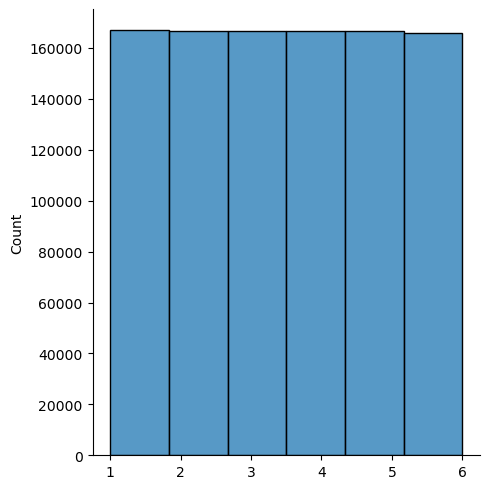

In [7]:
sns.displot(x= one_m, bins=6)

Finding out mean and standard deviation of whole population

In [9]:
np.mean(one_m)

3.497648

In [11]:
np.std(one_m)

1.707362430210997

Reshaping the population in sample size of 4 data-

In [13]:
one_h.reshape(25,4).mean(axis=1)

array([4.  , 4.25, 2.75, 2.  , 3.75, 3.5 , 4.  , 3.25, 2.5 , 3.5 , 4.75,
       3.75, 3.5 , 3.25, 3.  , 3.5 , 2.5 , 3.5 , 2.25, 3.25, 3.5 , 3.25,
       3.75, 3.75, 3.75])

Calculating mean of each sample and ploting it-

In [14]:
mean_m=one_m.reshape(250000,4).mean(axis=1)

(0.0, 6.0)

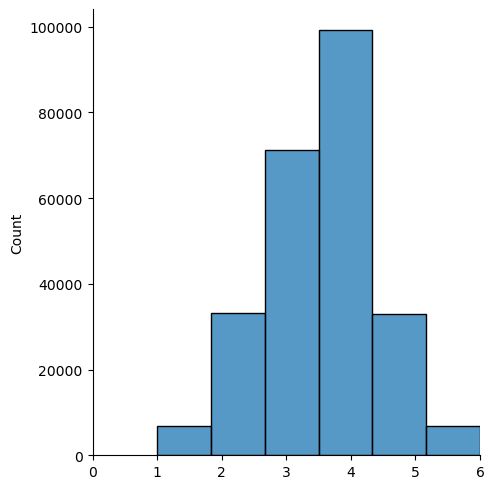

In [16]:
sns.displot(x=mean_m, bins=6)
plt.xlim(0,6)

The graph represent the normal distribution which proved the theorem that average of mean of sample of non normal sample gives normal distribution.
Further, mean of mean of each sample should be equal to the mean of population and standard deviation should be half. This can be shown in following code-

In [17]:
np.mean(mean_m)

3.497648

In [18]:
np.std(mean_m)

0.854633528534892

Let's increase the sample size to 100 data and examining it again.

In [21]:
mean_h=one_m.reshape(10000,100).mean(axis=1)

(0.0, 6.0)

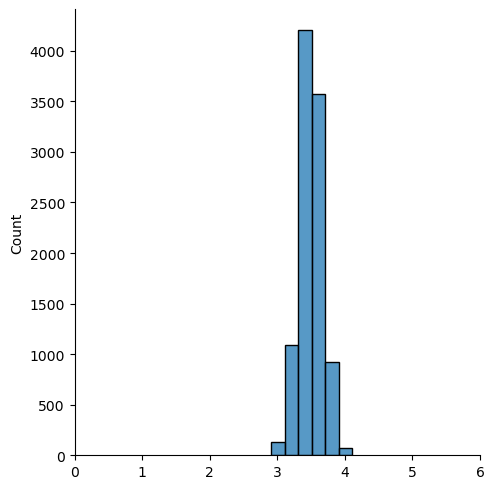

In [23]:
sns.displot(x=mean_h, bins=6)
plt.xlim(0,6)

In [24]:
np.mean(mean_h)

3.4976480000000003

In [25]:
np.std(mean_h)

0.16835904518617348

As the sample size increases by n, the standard deviation decreases by square root of n.

### Example 2- Proving Central Limit Theorm for bimodal distribution


1. Creating population 
    * ploting histogram
    * calculated mean and standard deviation

In [27]:
a= np.random.normal(100, 5, 1000)
b= np.random.normal(80, 5, 1000)
bm_data= np.append(a,b)
np.random.shuffle(bm_data)

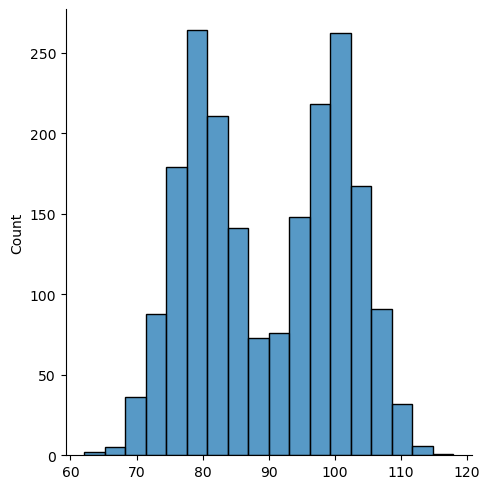

In [28]:
sns.displot(x=bm_data)

In [29]:
np.mean(bm_data)

89.9673914700407

In [30]:
np.std(bm_data)

11.1441794314903

2. Sampling the data-

In [31]:
sample_bm = bm_data.reshape(500,4).mean(axis=1)

3. Ploting sample and also calculating it's mean and standard deviation

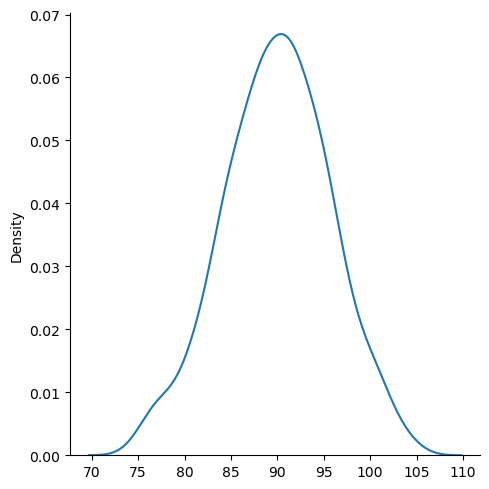

In [33]:
sns.displot(x=sample_bm, kind='kde')

In [34]:
np.mean(sample_bm)

89.9673914700407

In [35]:
np.std(sample_bm)

5.715636572474109

4. Increasing the sample size

(60.0, 120.0)

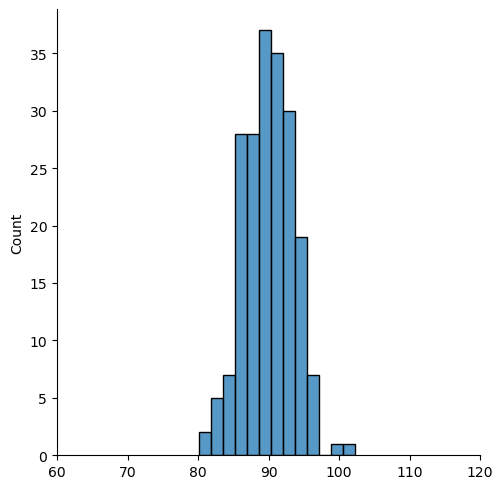

In [36]:
bm_10 = bm_data.reshape(200, 10).mean(axis=1)
sns.displot(bm_10)
plt.xlim(60,120)

### Conclusion-
The central limit theorem says that the sampling distribution of the mean will always be normally distributed, as long as the sample size is large enough. Regardless of whether the population has a normal, Poisson, binomial, or any other distribution, the sampling distribution of the mean will be normal.

## Hypothesis Testing Using Python

**Hypothesis Testing-**
  * a statistical hypothesis test is a method of statistical inference.
  * Commonly used tests include-
      * Compare sample statistic with population parameter
      * Compare two datasets

**Basic concepts-** In hypothesis testing, firstly we assume one condition is true an then we test to prove that it is true or not. In below examples, the shampoo producing company is assuming the maching is filling more volume in shampoo bottle than average of 150 cc.
1. Statistical vs practical significance- 
    1. In Statistical significance, we find out the difference between the standard measurement and sample measurement.
        1. Statistical significance
           1. For example, the shampoo bottle should have mean volume of 150cc but in sample testing the mean volume was 150.2 cc.
           2. Statistically, hypothesis was correct
        2.  Practical significance
            1. It tells us if there is any actionable information from the result
            2. Large samples can find out statistical difference for a very smal difference which might not be practical significance
            3. If the sample falls under 2 standard deviation, null hypothesis was correct for practical purpose
            
            
2. Hypothesis testing steps- 
    
    1. State the null hypothesis- is something which is true, for example, volume in the shampoo bottle is 150 cc. In statistical term, we always have to reject null hypothesis as we can  not prove it.    
    2. State the alternate hypothesis- 
        * is to provide alternate of null hypothesis. 
        * For example, we assumed that the machine is not filling the bottles with 150cc  and them proved it using statistic.
        * H0 is null hypothesis where as Ha is alternate hypothesis.
            1. State the alternate hypothesis-
                1. H0 = mean >= 150 cc
                2. Ha = mean < 150cc
            2. Upper Tail Tests-
                1. H0 = mean <= 150 cc
                2. Ha = mean > 150cc
            3. Two Tail Test-
                1. H0 = mean = 150 cc
                2. Ha = mean != 150cc
                
                
    3. State the probability of error level(alpha level). Generally, 0.05
    
    
    4. Type 1 and Type 2 errors-


        1. Type 1 error(alpha)- known as producer's risk/ significance level
            1. Assuming and concluding there is change i.e. Ha==true but in reality H0 == True
            2. 1- alpha = confidence level
            3. Innocent but declared guilty
            4. lead to inconvenience
            5. usually fixed at pre determined level, 1%, 5% or 10%
            6. unnecessary cost increase due to frequent changes
        2. Type 2 error(beta)-  known as consumer's risk
            1. Assuming and concluding there is no change i.e. H0==true but in reality Ha == True
            2. power of test=1- beta
                1. likelihood of rejecting null hypothesis is when null hypothesis is false
                2. Or, Power is th e ability of a test to correctly reject the null hypothesis
            3. guilty declared as innocent
            4. lead to disaster(eg- fire alarm missing fire or innocent is declared guilty in court)
            5. usually controlled to <10% by appropriate sample size
            6. defects may be produced
        
        
    
    5. Calculate the test statistic (eg, t or z score)-
         1. Z calculated = (Observed mean - population mean) / standard error
         
                    z = (x — μ) / (σ / √n)
    
    
    6. Critical test statistic
        1. Value for critical test statistics is 1.96
        2. for various levels of alpha, following are the z critical value
            1. alpha = 0.01: Two Tail = 0.005: Z critical = 2.575
            2. alpha = 0.05: Two Tail = 0.025: Z critical = 1.96
            3. alpha = 0.10: Two Tail = 0.05 : Z critical = 1.645
            4. alpha = 0.05: Single Tails    : Z critical = 1.645
    
    7. Interpret the results
    
    
    
    8. The p Value- 
        1. p value is the lowest value of alpha for which the null hypothesis can be rejected.(Probability that null hypothesis is correct)
        2. for example, if p = 0.045 you can reject the null hypothesis at alpha =0.05
        3. mantra-> p is low the null must go / p is high the null fly

#### Example: 
A machine is producing shampoo bottles with the long term average of 150cc and the standard deviation of 2 cc.
Four bottles were picked and the average volume was found to be 153.8cc.
Has the average volume changed from 150cc? Test with 95% confidence level.

Want to prove-

Alternate Hypothesis: Mean volume != 150cc

Null Hypothesis: Mean volume = 150cc

Alpha = 1 - 0.95 = 0.05

Z calculated = (Observed mean - population mean) / standard error
z = (x — μ) / (σ / √n)

In [38]:
z_calc = (153.8-150)/(2/np.sqrt(4))
z_calc

3.8000000000000114

-------------------------------------------------------------------------------------------------
#### Some norm functions
 norm.pdf(x, loc=0, scale=1) Probability density function.

 norm.cdf(x, loc=0, scale=1)  Cumulative distribution function. (area to the left of x)

 norm.sf(x, loc=0, scale=1) Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).

 norm.ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).

 norm.isf(q, loc=0, scale=1) Inverse survival function (inverse of sf).
 
 -----------------------------------------------------------------------------------------------

Area to the left of that particular point-

In [41]:
norm.cdf(0)

0.5

In [44]:
norm.ppf(0.025)

-1.9599639845400545

In [42]:
norm.cdf(-1.96)

0.024997895148220435

Area to the right of that particular point

In [43]:
norm.sf(1.96)

0.024997895148220435

In [45]:
norm.isf(0.025)

1.9599639845400545

We reject the null hypothesis as z = 3.8 which is far far right of normal distribution

In [ ]:
# Thinking in terms of p-value

In [47]:
pvalue = 2 * norm.sf(z_calc) # area to the right of Z_cal (on two tails)
pvalue

0.0001446960878502333

Compared to the alpha value of 0.05, the p-value is low, hence null gets rejected.